In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [15]:
df['year'] = df.Day.apply(lambda x: x.year)

yearGroups = df.groupby(['year'])
yearsTempMean = yearGroups.t.mean()

maxTemp, minTemp = yearsTempMean.max(), yearsTempMean.min()

'Coldest: {}, warmest: {}'.format(
    yearsTempMean[yearsTempMean == minTemp].index.values,
    yearsTempMean[yearsTempMean == maxTemp].index.values,
)

# mean_ts = df.groupby(['year']).t.mean()
# max_t, min_t = mean_ts.max(), mean_ts.min()
# 'Самый холодный - {}, самый теплый - {}'.format(mean_ts[mean_ts == min_t].index.values,
#  mean_ts[mean_ts == max_t].index.values)

'Coldest: [2012], warmest: [2015]'

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [16]:
df['month'] = df.Day.apply(lambda x: x.month)

janWithTempGreaterZero = (df.month == 1) & (df.t >= 0)
result = df[janWithTempGreaterZero].groupby(['year']).t.count()

resultYear = result.max()

print(result[result == resultYear].index.values)

[2008]


**3.** В каком году было самое холодное лето (по средней температуре)

In [18]:
isSummerMonth = df.month.isin([6, 7, 8])

yearSummerMeanTemp = df[isSummerMonth].groupby(by='year').t.mean()
coldestYear = yearSummerMeanTemp.min()
print(yearSummerMeanTemp[yearSummerMeanTemp == coldestYear].index.values)

[2008]


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [19]:
df['tempDiff'] = abs(df.t - df.t.shift(-1))
maxDiff = df['tempDiff'].max()
pd.to_datetime(df[df.tempDiff == maxDiff].Day.values[0]).strftime('%Y.%m.%d')

'2014.05.26'

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

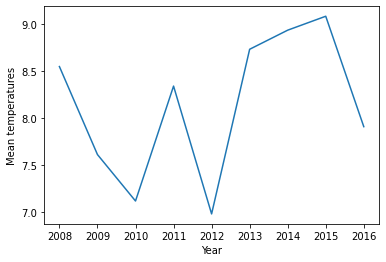

In [20]:
meanTemps = df.groupby(['year']).t.mean()
meanTemps.plot()
plt.xlabel("Year")
plt.ylabel("Mean temperatures")
plt.show()